# Comparison of algorithm

We focus on real projective spaces and their suspensions, representing the action of $Sq^k$ on the cohomology generator in degree $d$ of the $i$ suspension of $\mathbb R \mathrm P^n$.

In [1]:
from new_implementation import SQ
from time import perf_counter
import pickle
import matplotlib.pyplot as plt

def create_space(i, n):
    """Returns a simplicial complex model of the sth 
    suspension of RPn"""
    space = simplicial_complexes.RealProjectiveSpace(n)
    space = space.suspension(i)
    space.set_immutable()
    return space

def num_simplices(i, n):
    "Returns the number of simplices of Si RPn given (i,n)"
    space = create_space(i, n)
    return sum(len(v) for v in space.faces().values())

def new_times(i, n, k, d, repeat=1):
    """
    Stores in dict data the time it takes to compute Sqk(d)
    on Si RPn"""
    time = 0
    space = create_space(i, n)
    P = space.cohomology_ring(GF(2))
    x = P.basis()[(d, 0)]
    for _ in range(repeat):
        tic2 = perf_counter()  # time
        new = SQ(x, k)
        toc2 = perf_counter()  # time
        time += (toc2 - tic2)/repeat

    print(f'S{i} RP{n} | Sq{k}({d}) | {repeat} |'+
          f'  {int(bool(new))}  | {time:{0}.{4}}')
    data[(i, n, k, d)] = time
    
def compare(i, n, k, d, repeat=1):
    """
    Stores in dict data the pair of times it takes to compute
    Sqi(d) on Si RPn"""
    pair = [0, 0]
    space = create_space(i, n)
    P = space.cohomology_ring(GF(2))
    x = P.basis()[(d, 0)]
    for _ in range(repeat):
        tic1 = perf_counter()  # time
        old = x.Sq(k)
        toc1 = perf_counter()  # time
        pair[0] += (toc1-tic1)/repeat

        tic2 = perf_counter()  # time
        new = SQ(x, k)
        toc2 = perf_counter()  # time
        pair[1] += (toc2 - tic2)/repeat

    if not old == new:
        print("something went wrong")
        
    print(f"S{i} RP{n} | Sq{k}-{d:<2} | {repeat :<7} | {int(bool(new)):^3} |" +
          f" {str(pair[0]/pair[1])[:7]} | {str(pair[0]+pair[1])[:7]}")
    
    data[(i, n, k, d)] = tuple(pair)
    
def save_obj(obj, name):
    """Save pickle file"""
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    """Load pickle file"""
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def compare_plot(data, name, xstring, save=True, log=True, rotate=False):
    "Plotting function tunned for our needs"
    plt.figure(figsize=(10,5))
    x = [str(k).replace(' ','') for k in data.keys()]
    y1 = [v[0]*1000 for v in data.values()]
    y2 = [v[1]*1000 for v in data.values()]
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.ylabel('Execution time in miliseconds\n', fontsize='large')
    plt.xlabel(xstring, fontsize='large')
    if rotate:
        plt.xticks(rotation=45)
    if log:
        plt.yscale('log')
    if save:
        plt.savefig(name, bbox_inches='tight')
    plt.show()

## $Sq^1(i+1)$ on $\Sigma^i \mathbb R \mathrm P^2$ for $i \in \{0, \dots, 9\}$

In [14]:
def compare(i, n, k, d, repeat=1):
    """
    Stores in dict data the pair of times it takes to compute
    Sqi(d) on Si RPn"""
    pair = [0, 0]
    space = create_space(i, n)
    P = space.cohomology_ring(GF(2))
    x = P.basis()[(d, 0)]
    for _ in range(repeat):
        tic1 = perf_counter()  # time
        old = x.Sq(k)
        toc1 = perf_counter()  # time
        pair[0] += (toc1-tic1)/repeat

        tic2 = perf_counter()  # time
        new = SQ(x, k)
        toc2 = perf_counter()  # time
        pair[1] += (toc2 - tic2)/repeat

    if not old == new:
        print("something went wrong")
        
    print(f"S{i} RP{n} | Sq{k}-{d:<2} | {repeat :<7} | {int(bool(new)):^3} |" +
          f" {str(pair[0]/pair[1])[:7]} | {str(pair[0]+pair[1])[:7]}")
    
    data[(i, n, k, d)] = tuple(pair)

In [15]:
data = {}
reps = 10000
print('Space  | OP    | rpt     | img | old/new | total')
print('-'*54)
t = perf_counter()
for i in range(10):
    compare(i, 2, 1, i+1, repeat=int(reps/2**i))
tt = perf_counter()
print('-'*54)
print(f'It took {tt-t} secs')
save_obj(data, 'comp_sus_rp2')

Space  | OP       | rpt     | img | old/new | new
------------------------------------------------------
S0 RP2 | Sq1-1    | 1       |  1  | 0.59586 | 0.00012
S1 RP2 | Sq1-2    | 1       |  1  | 80.6342 | 0.01168
S2 RP2 | Sq1-3    | 1       |  1  | 407.067 | 0.03650
S3 RP2 | Sq1-4    | 1       |  1  | 1442.70 | 0.13610
S4 RP2 | Sq1-5    | 1       |  1  | 778.823 | 0.22421
S5 RP2 | Sq1-6    | 1       |  1  | 1926.89 | 0.42396
S6 RP2 | Sq1-7    | 1       |  1  | 6068.65 | 0.85336
S7 RP2 | Sq1-8    | 1       |  1  | 10761.2 | 1.52264
S8 RP2 | Sq1-9    | 1       |  1  | 17443.3 | 2.65756
S9 RP2 | Sq1-10   | 1       |  1  | 19128.1 | 4.52946
------------------------------------------------------
It took 651.69551166 secs


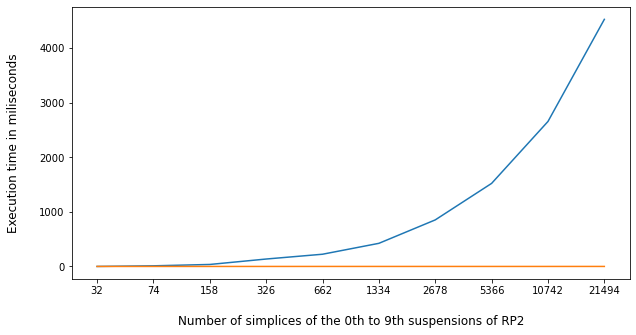

In [16]:
data = load_obj('comp_sus_rp2')
data = {f'{num_simplices(k[0], 2)}':v for k,v in data.items()}
name = 'comp_sus_rp2.pdf'
xstring = '\nNumber of simplices of the 0th to 9th suspensions of RP2'
compare_plot(data, name, xstring, log=False)

## General $Sq^k(d)$ on $\Sigma^s \mathbb R \mathrm P^n \sim (s,n,k,d)$

In [ ]:
cases = [
    (0,2,1,1), (1,2,1,2), (2,2,1,3), (3,2,1,4), (4,2,1,5),
    (0,3,1,1), (0,3,1,2),
    (1,3,1,2), (1,3,1,3), (1,3,2,2),
    (2,3,1,3), (2,3,1,4), (2,3,2,3),
    (3,3,1,4), (3,3,1,5), (3,3,2,4),
    (0,4,1,1), (0,4,1,2), (0,4,1,3), (0,4,2,2),
    (1,4,1,2), (1,4,1,3), (1,4,1,4), (1,4,2,2), (1,4,2,3),
    (2,4,1,3), (2,4,1,4), (2,4,1,5), (2,4,2,3), (2,4,2,4),
]

#(0,5,1,1), (0,5,1,2), (0,5,1,3), (0,5,2,2), (0,5,2,3) # Warning: old version takes an hour each of these

In [133]:
# data = {}
# reps = 0
# print('Space  | OP     | rpt | img | old/new | new')
# print('-------------------------------------------')
# t = perf_counter()
# for case in cases:
#     compare(*case, repeat=reps)
# tt = perf_counter()
# print('-------------------------------------------')
# print(f'It took {tt-t} secs')
# save_obj(data, 'comp_times')

Space  | OP     | rpt | img | old/new | new
-------------------------------------------
S0 RP2 | Sq1(1) | 10 |  1  | 0.37723 | 8.946e-05
S1 RP2 | Sq1(2) | 10 |  1  | 114.154 | 8.748e-05
S2 RP2 | Sq1(3) | 10 |  1  | 389.991 | 8.93e-05
S3 RP2 | Sq1(4) | 10 |  1  | 881.473 | 0.000105
S4 RP2 | Sq1(5) | 10 |  1  | 1614.23 | 0.0001386
S0 RP3 | Sq1(1) | 10 |  1  | 0.10394 | 0.0002471
S0 RP3 | Sq1(2) | 10 |  0  | 409.237 | 0.0001232
S1 RP3 | Sq1(2) | 10 |  1  | 192.138 | 0.0002995
S1 RP3 | Sq1(3) | 10 |  0  | 1856.56 | 0.0001478
S1 RP3 | Sq2(2) | 10 |  0  | 0.11443 | 0.0002398
S2 RP3 | Sq1(3) | 10 |  1  | 963.033 | 0.0004136
S2 RP3 | Sq1(4) | 10 |  0  | 5534.91 | 0.0001997
S2 RP3 | Sq2(3) | 10 |  0  | 2929.69 | 0.00033
S3 RP3 | Sq1(4) | 10 |  1  | 3679.88 | 0.0005135
S3 RP3 | Sq1(5) | 10 |  0  | 15097.6 | 0.0002281
S3 RP3 | Sq2(4) | 10 |  0  | 21319.7 | 0.0004485
S0 RP4 | Sq1(1) | 10 |  1  | 0.04832 | 0.001145
S0 RP4 | Sq1(2) | 10 |  0  | 757.104 | 0.000994
S0 RP4 | Sq1(3) | 10 |  1  | 7599.90

KeyboardInterrupt: 

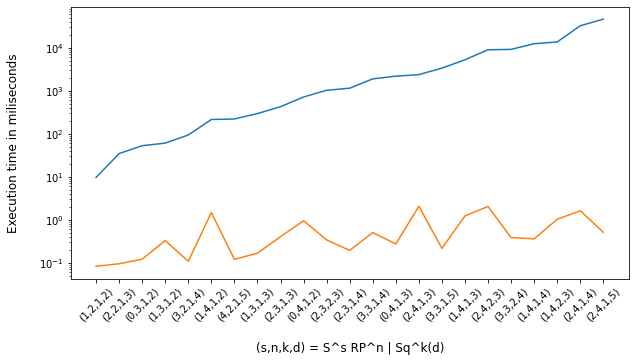

In [98]:
data = load_obj('comp_times')
data = {k:v for k, v in data.items() if k[2] != k[3]}
name = 'comparison.pdf'
xstring = '\n(s,n,k,d) = S^s RP^n | Sq^k(d)'
compare_plot(data, name, xstring, log=True, rotate=True)